## FLIGHT PRICE PREDICTION

### PROJECT OBJECTIVE
The objective of the Flight Price Prediction project is to develop machine learning models that can accurately predict flight prices based on various input features. By leveraging Random Forest and Decision Tree classifiers, the project aims to help airlines optimize their pricing strategies and assist travelers in planning their trips more efficiently.


### Importing the necessary libraries
  

In [117]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

### Importing the Dataset
  1. First we have to load the excel dataset using pd.read_excel() method.
  2. After loading the data we have check for the missing values.
  3. Thenafter we have to handle these missing values.
  4. In most cases, dropping data only makes sense when you have a large number of missing or nan  values. For example ,you have a feature with 98% missing/nan values, it is not going to be of much use to any algorithm. Also imputing that feature is not going to work as you don't have much data to go on with.
  5. But if there are reasonable number of nan values, then the best option is to try to impute them. There are 2 ways you can impute nan values:-
       - Univariate Imputation : Imputing missing values with Mean, Median,Mode using fillna() method.
       - Multivariate Imputation: Imputing missing values with KNNImputer,IterativeImputer
       
   6. After that we have to also find the some statistical analysis.  
   7. We can find the statistical analysis using describing the data

In [118]:
#Installing the openpyxl for reading the excel files with pandas 
#pip install openpyxl


In [119]:
# Load the training dataset from an Excel file into a pandas DataFrame
train_data=pd.read_excel('C:\\Users\\RITIK CHAUHAN\\Desktop\\Rishabh\\ML Assignment\\Data 1\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx')


In [120]:
# Set pandas display option to show all columns
pd.set_option('display.max_columns',None)

In [121]:
# Displaying the first five rows of the dataframe
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [122]:
# Display information about the DataFrame 'train_data'
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Columns and Data Types in the dataset
- Airline (object): The airline operating the flight.
- Date_of_Journey (object): The date of the journey.
- Source (object): The source or departure city.
- Destination (object): The destination city.
- Route (object): The route taken by the flight. Note that there is 1 missing value.
- Dep_Time (object): The departure time of the flight.
- Arrival_Time (object): The arrival time of the flight.
- Duration (object): The duration of the flight.
- Total_Stops (object): The number of stops the flight makes. Note that there is 1 missing value.
- Additional_Info (object): Any additional information about the flight.
- Price (int64): The price of the flight ticket.


Memory Usage:

- The DataFrame uses approximately 918.2 KB of memory.


Notes:
- The majority of the columns are of type object, which means they contain text or mixed data.
- The Price column is of type int64, indicating that it contains integer values.
- There are two columns (Route and Total_Stops) with missing values, each with 1 missing entry.

In [123]:
#Printing the shape of the training dataset
train_data.shape

(10683, 11)

The shape of the data is 10683 rows and 11 columns

In [124]:
# Check for missing values in the DataFrame 'train_data'
# The isnull() method detects missing values
# The sum() method sums up the count of missing values for each column
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Null Values Summary
Total Number of Missing Values: **2**

Columns with Missing Values: **[Route,Total_Stops]**

**Route**:

Number of missing values: 1

Percentage of missing values: 
(1/10683)×100≈0.0093%


**Total_Stops**:

Number of missing values: 1

Percentage of missing values: 

(1/10683)×100≈0.0093%

**Overall Impact:**

The missing values are confined to two specific columns (Route and Total_Stops), each having only one missing value.

**Implications:**

Given the extremely low percentage of missing values, their impact on the dataset and any subsequent analysis or modeling is minimal.

These missing values can be handled easily through methods like imputation, deletion, or filling with appropriate values based on the context of the data.

In [125]:
#Printing the total count of the missing values
total_missing_values=train_data.isnull().sum().sum()
print("There are {} missing values".format(total_missing_values))

There are 2 missing values


In [126]:
#So there are only two missing values so we can drop these missing values
#By dropping the missing values there are no major change in the original dataset
#So I dropped the missing values
train_data.dropna(inplace=True)

In [127]:
#After dropping the missing values
#Checking for missing values
#All missing values are dropped
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now, in the dataset no missing values are present. We have drop these values by using dropna() method.

In [128]:
#Now the training data shape change
# It changes to (10682,11)
#Means 10682 rows and 11 columns
train_data.shape

(10682, 11)

In [129]:
# Count the number of occurrences of each unique value in the 'Duration' column of the DataFrame 'train_data'
train_data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

### Exploratory Data Analysis

- From the data we see that Date_of_Journey having a object datatype.
- Object datatype contains text or mixed data.
- This creates a problem ,when we dealing with the dates because object datatype is not the suitable datatype when dealing with date.
- So we have to convert the object datatype into datetime datatype so as to use this column properly for prediction.
- So we require pandas to_datetime to conert the object datatype to datetime datatype. 




.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [130]:
# Convert the 'Date_of_Journey' column to datetime format and extract the day of the journey
# The format argument specifies the format of the input date string
#Date of the journey are extracted and stores into the Day_of_Journey column  
train_data['Day_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'],format= "%d/%m/%Y").dt.day

In [131]:
#Month of the journey are extracted and stores into the Month_of_Journey column  
train_data['Month_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'],format= "%d/%m/%Y").dt.month

### Count of flight month wise

Text(0, 0.5, 'Count of flights')

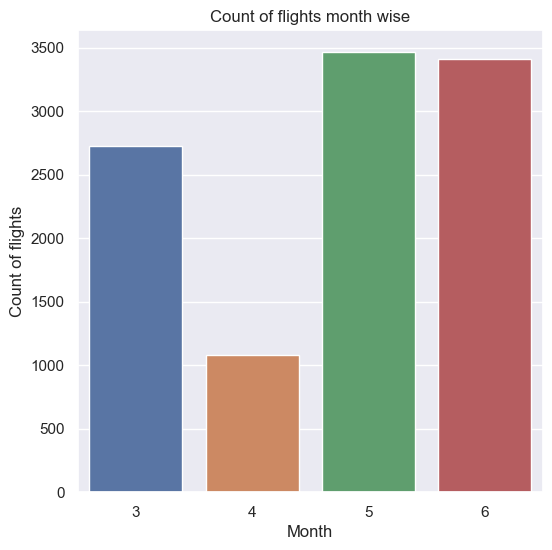

In [132]:
# Create a figure with specified size
plt.figure(figsize = (6, 6))

# Set the title of the plot
plt.title('Count of flights month wise')

# Create a count plot for the 'Month_of_Journey' column in the 'train_data' DataFrame
# This will show the count of flights for each month
sns.countplot(x ='Month_of_Journey', data = train_data)

# Set the label for the x-axis
plt.xlabel('Month')

# Set the label for the y-axis
plt.ylabel('Count of flights')


### Counts of each flights with respect to months

Text(0, 0.5, 'Count of flights')

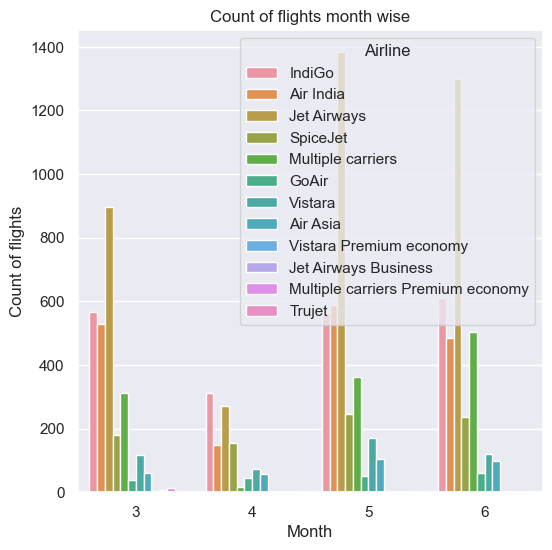

In [133]:
# Create a figure with specified size
plt.figure(figsize = (6, 6))

# Set the title of the plot
plt.title('Count of flights month wise')

# Create a count plot for the 'Month_of_Journey' column in the 'train_data' DataFrame
# This will show the count of flights for each month
sns.countplot(x ='Month_of_Journey', data = train_data,hue='Airline')

# Set the label for the x-axis
plt.xlabel('Month')

# Set the label for the y-axis
plt.ylabel('Count of flights')

In [134]:
#Printing the top 5 values
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [135]:
#Now we have separated the days,month,year column from the Date_of_Journey Column
#So drop the Date_of_Journey column from the training data
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [136]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [137]:
#Now we have to extract the hours and minutes from the departure time

#Taking the hours separately from the Dep_Time column
train_data['Departure_hours']=pd.to_datetime(train_data['Dep_Time']).dt.hour

#Taking the minutes separately from the Dep_Time column
train_data['Departure_minutes']=pd.to_datetime(train_data['Dep_Time']).dt.minute

#Now there is no need of Dep_Time colum because we have separated the hours and minutes columns
#So,now dropping the Dep_Time column from the original dataset
#axis=1 means dropping the column
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [138]:
#printing the top 1 value
train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [139]:
#Similarly we have to extract the hours and minutes for the arrival time as well 
#And the method to extract the hours and minutes are same as previous method where we have extract the hours and minutes from the departure time

#Taking the hours column separately from the Arrival_Time column
train_data['Arrival_hours']=pd.to_datetime(train_data['Arrival_Time']).dt.hour 

#Taking the minutes column separately from the Arrival_Time column
train_data['Arrival_minutes']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

#Now dropping the Arrival_Time column 
#Because we have separated the hours and minute columns 
#So there is no need of the Arrival_Time column
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [140]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [141]:
#Function to split the hours and minutes the duration
def splitting_the_hours_and_minutes(duration_column):
    hours, minutes = 0, 0
    
    if 'h' in duration_column:
        hours = int(duration_column.split('h')[0])
        duration_column = duration_column.split('h')[1]
        
    if 'm' in duration_column:
        minutes = int(duration_column.split('m')[0].strip())
    
    return hours, minutes

# Apply the function to the 'Duration' column
train_data['Duration_hours'] = train_data['Duration'].apply(lambda x: splitting_the_hours_and_minutes(x)[0])
train_data['Duration_minutes'] = train_data['Duration'].apply(lambda x: splitting_the_hours_and_minutes(x)[1])

train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [142]:
#Now we have splitted the hours and minutes columns separately from the Duration column 
#So there is no need of Duration Column
#Because we have already splitted the hours and minute so drop the Duration column
train_data.drop(['Duration'],axis=1,inplace=True)
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


### Handling Categorical Data

#### Categorical Data Types:
 - There are two types of categorical data and there are different methods to handle categorical data.
 
       1. Nominal Data

       2. Ordinal Data

  - Nominal Data: The data which do not have any order. And these data can be handle by OneHotEncoder method.

  - Ordinal Data: The data which have order. And these data can be handle by LabelEncoder method

  - One-Hot Encoding is a process of converting categorical data into a binary (0 and 1) representation. Each unique category value in a categorical feature is converted into a new binary feature, and each instance is marked with a 1 or 0 depending on whether that instance has that particular category value.

  - Label Encoding is a technique used to convert categorical data into numerical format. Each unique category value in a categorical feature is assigned a unique integer label. Unlike one-hot encoding, label encoding does not create additional columns. Instead, it replaces the categorical values with integer values.




In [143]:
#We know that in Airline Column there are categorical values
#Like in these there many airplanes names
#First we have to count the total values of individual airplanes
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

The Airline column contains categorical values representing different airlines. Below is the count of occurrences for each airline:

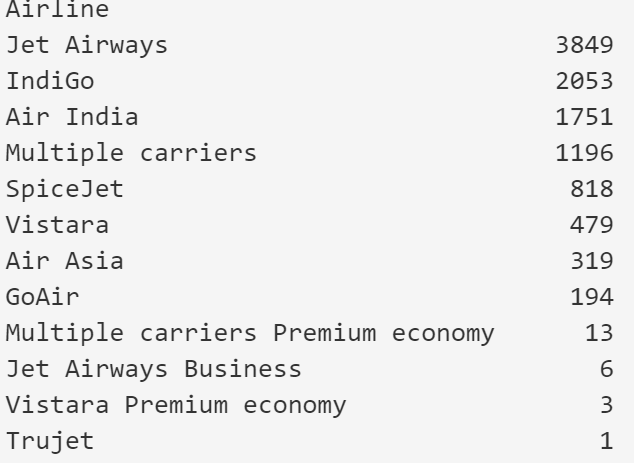


Key points:

1. Most Frequent Airline: Jet Airways is the most frequent airline, appearing 3,849 times in the dataset.

2. Least Frequent Airline: Trujet is the least frequent airline, appearing only once in the dataset.

3. Multiple Carrier Types: There are categories indicating combinations of carriers, such as Multiple carriers (1,196) and Multiple carriers Premium economy (13).

4. Premium Economy and Business Classes: he dataset includes premium categories such as Multiple carriers Premium economy (13), Jet Airways Business (6), and Vistara Premium economy (3).




### Count of flight with different Airlines

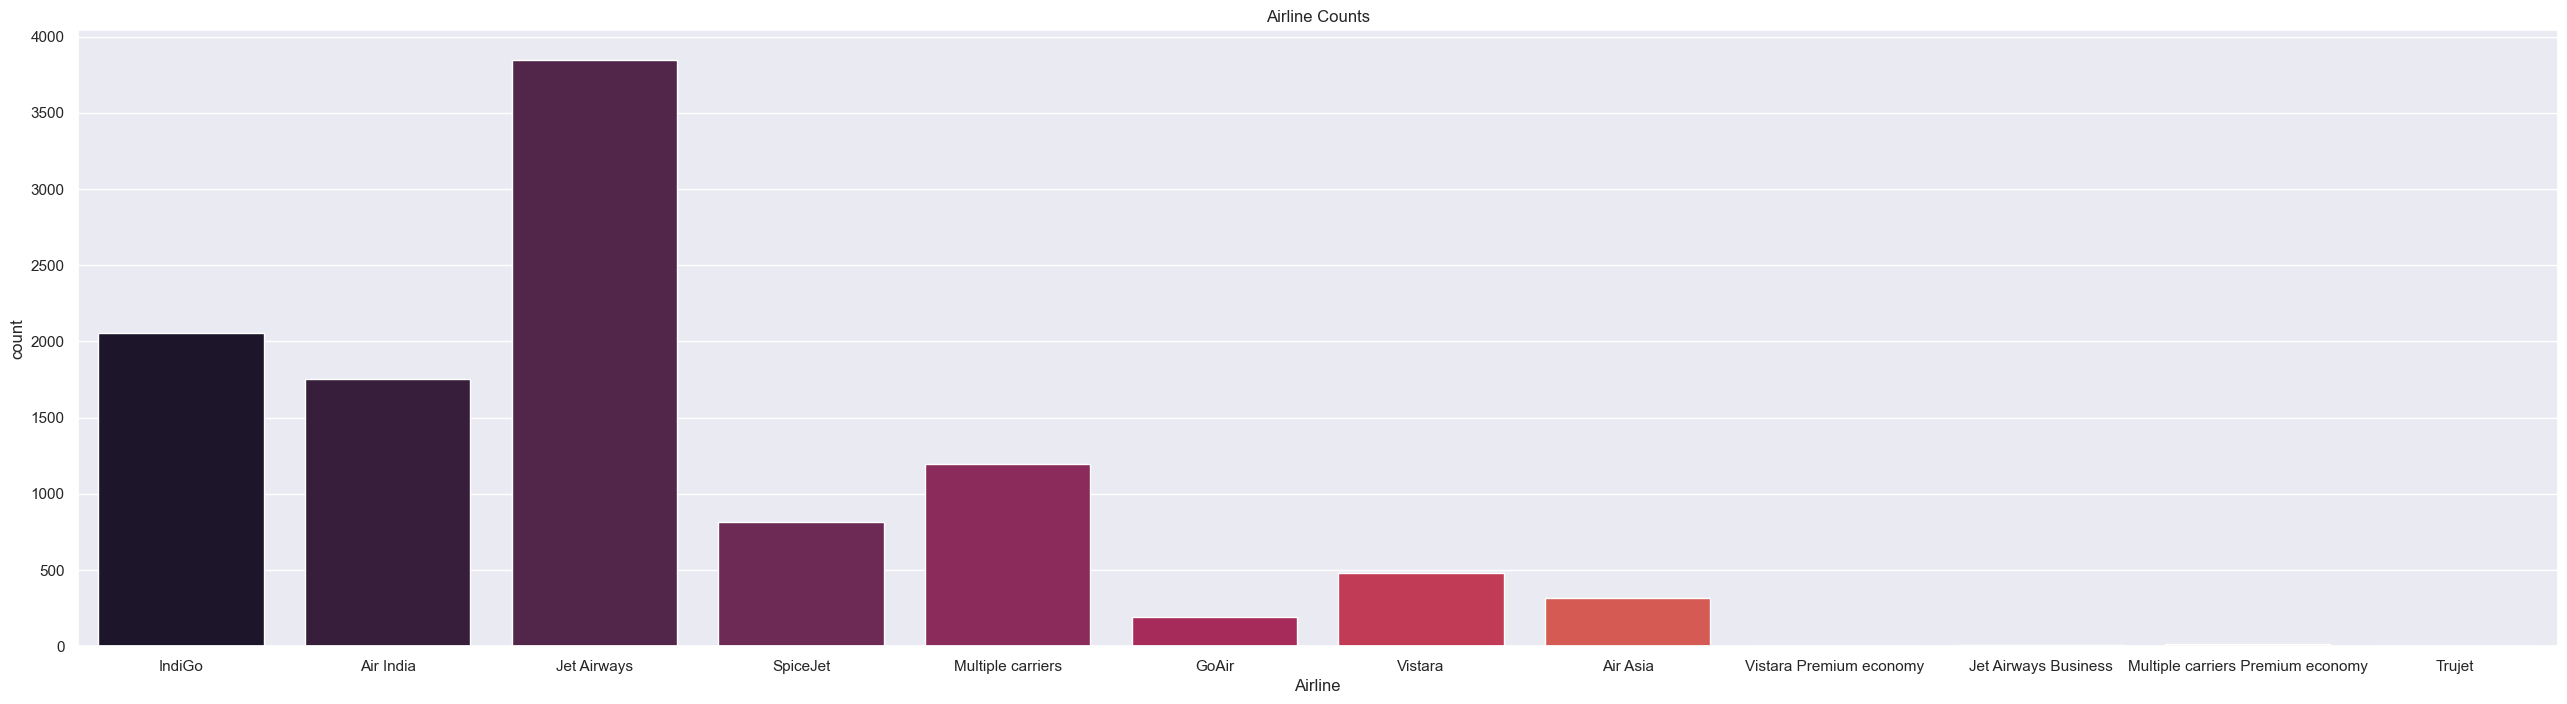

In [144]:
#Now plotting the graph Airline Counts

plt.title('Airline Counts')
sns.countplot(x='Airline',data=train_data,palette='rocket')

# setting the figure size
width = 32
height = 8
sns.set(rc = {'figure.figsize':(width,height)})

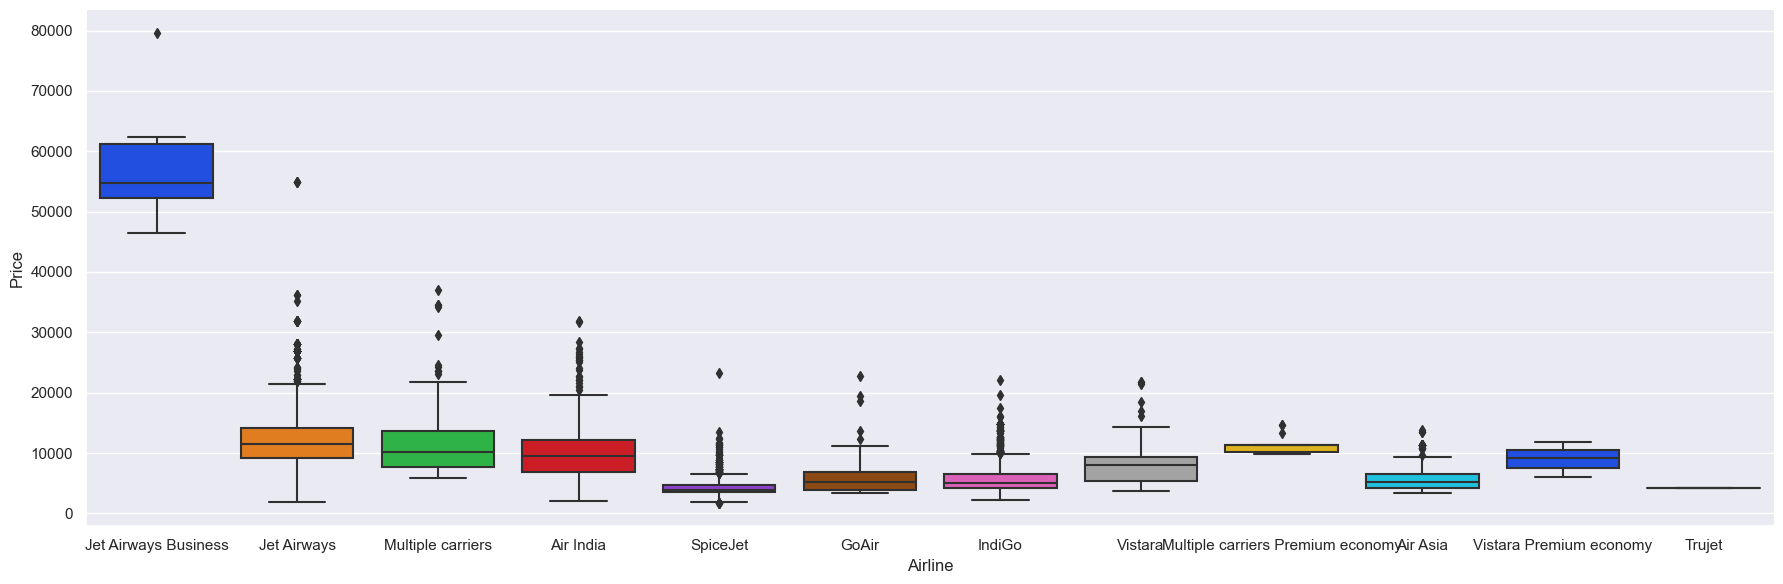

In [145]:
#Plotting the graph Airline vs Price
# plt.show()
sns.catplot(y="Price", x="Airline", palette='bright', data=train_data.sort_values("Price", ascending=False), kind="box", height=6, aspect=3)
plt.show()

Above the graph, Jet Airways Business price are very high compare to  other's flight. We can say that Jet Airways Business price are outliers for other's flight price.

And other than Jet Airways Business all have almost same price

In [146]:
#Airline column contains the nominal categorical data
#In Airline column all values are strings 
#We have to convert these string values into the binary value 0 ,1 
#We have to convert into the binary values because whenever we train the model it gives error.
#Because Machine Learning Model only works with numerical values not the categorical values
#So we have to convert the catgeorical values into numerical values using OneHotEncoder metho
#These data are the nominal categorical data that's why we use the OneHotEncoder method on Airline Column

Airline=train_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head(2)
 

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False


In [147]:
#Now convert the True False values into binary 
#Because ML model cannot work with catgegorical data


# Perform one-hot encoding with get_dummies
Airline = pd.get_dummies(train_data.Airline, drop_first=True, dtype=int)

# Rename the columns
#Airline_OHE_=(Airline_OneHotEncoding_Feature_Name)
Airline.columns = ['Airline_OHE_' + airline for airline in Airline.columns]

# Display the DataFrame
Airline.head()
 

,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Trujet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [148]:
#In source column there also a categorical feature
train_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [149]:
#Unique values in the Source column
#There are five cities in the Source column
#And the cities are Banglore,Kolkata,Delhi,Chennai,Mumbai
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [150]:
#There are five cities in the source column
total_counts_of_the_cities = train_data['Source'].nunique()
print(f"There are {total_counts_of_the_cities} cities.")


There are 5 cities.


### Plot between Price and Source

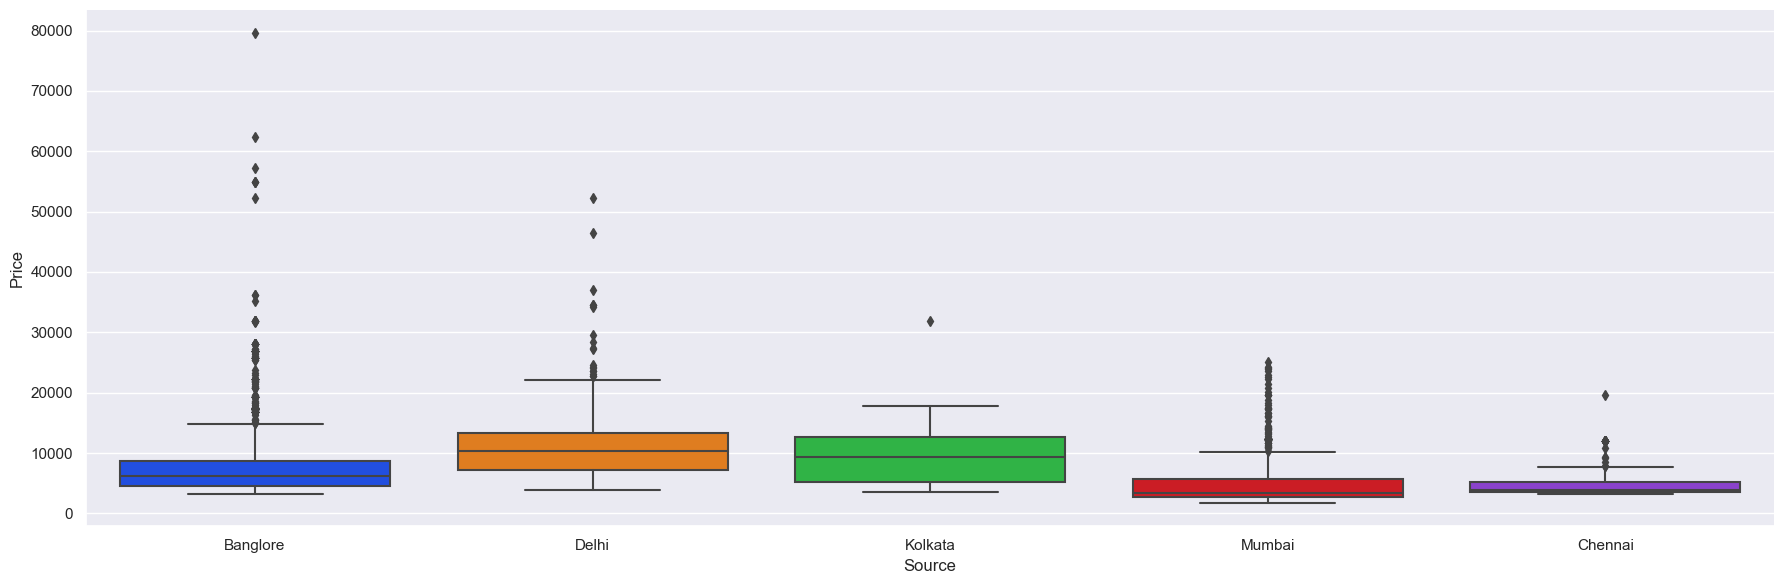

In [151]:
#Visualization of the categorical values of the Source Column
#Visualization between Price and Source
#Source column consists of five cities:
#Banglore,Delhi,Kolkata,Chennai,Mumbai
sns.catplot(y="Price", x="Source", palette='bright', data=train_data.sort_values("Price", ascending=False), kind="box", height=6, aspect=3)
plt.show()

#There are some outliers into the Banglore or also some amount of outliers into the Delhi

In [152]:
#Similarly to Airline Column
#In Source Column the values are categorical
#So we have to convert these values into the numerical
#So there are five cities only ,so that's why we have to use the OneHotEncoding

# Perform one-hot encoding with get_dummies
Source = pd.get_dummies(train_data.Source, drop_first=True, dtype=int)

# Rename the columns
#Source_OHE_=(Source_OneHotEncoding_Feature_Name)
Source.columns = ['Source_OHE_' + source for source  in Source.columns]

# Display the DataFrame
Source.head()

,Source_OHE_Chennai,Source_OHE_Delhi,Source_OHE_Kolkata,Source_OHE_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [153]:
#In Destination Column there are also the Categorical Values
#So the Value Counts of the Destination Column are given below:
train_data['Destination'].value_counts()

#In Destination Column there are six cities
#And they are Cochin,Banglore,Old Delhi,New Delhi, Hyderabad,Kolkata

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: title={'center': 'Destination Cities Counts'}, xlabel='Destination', ylabel='count'>

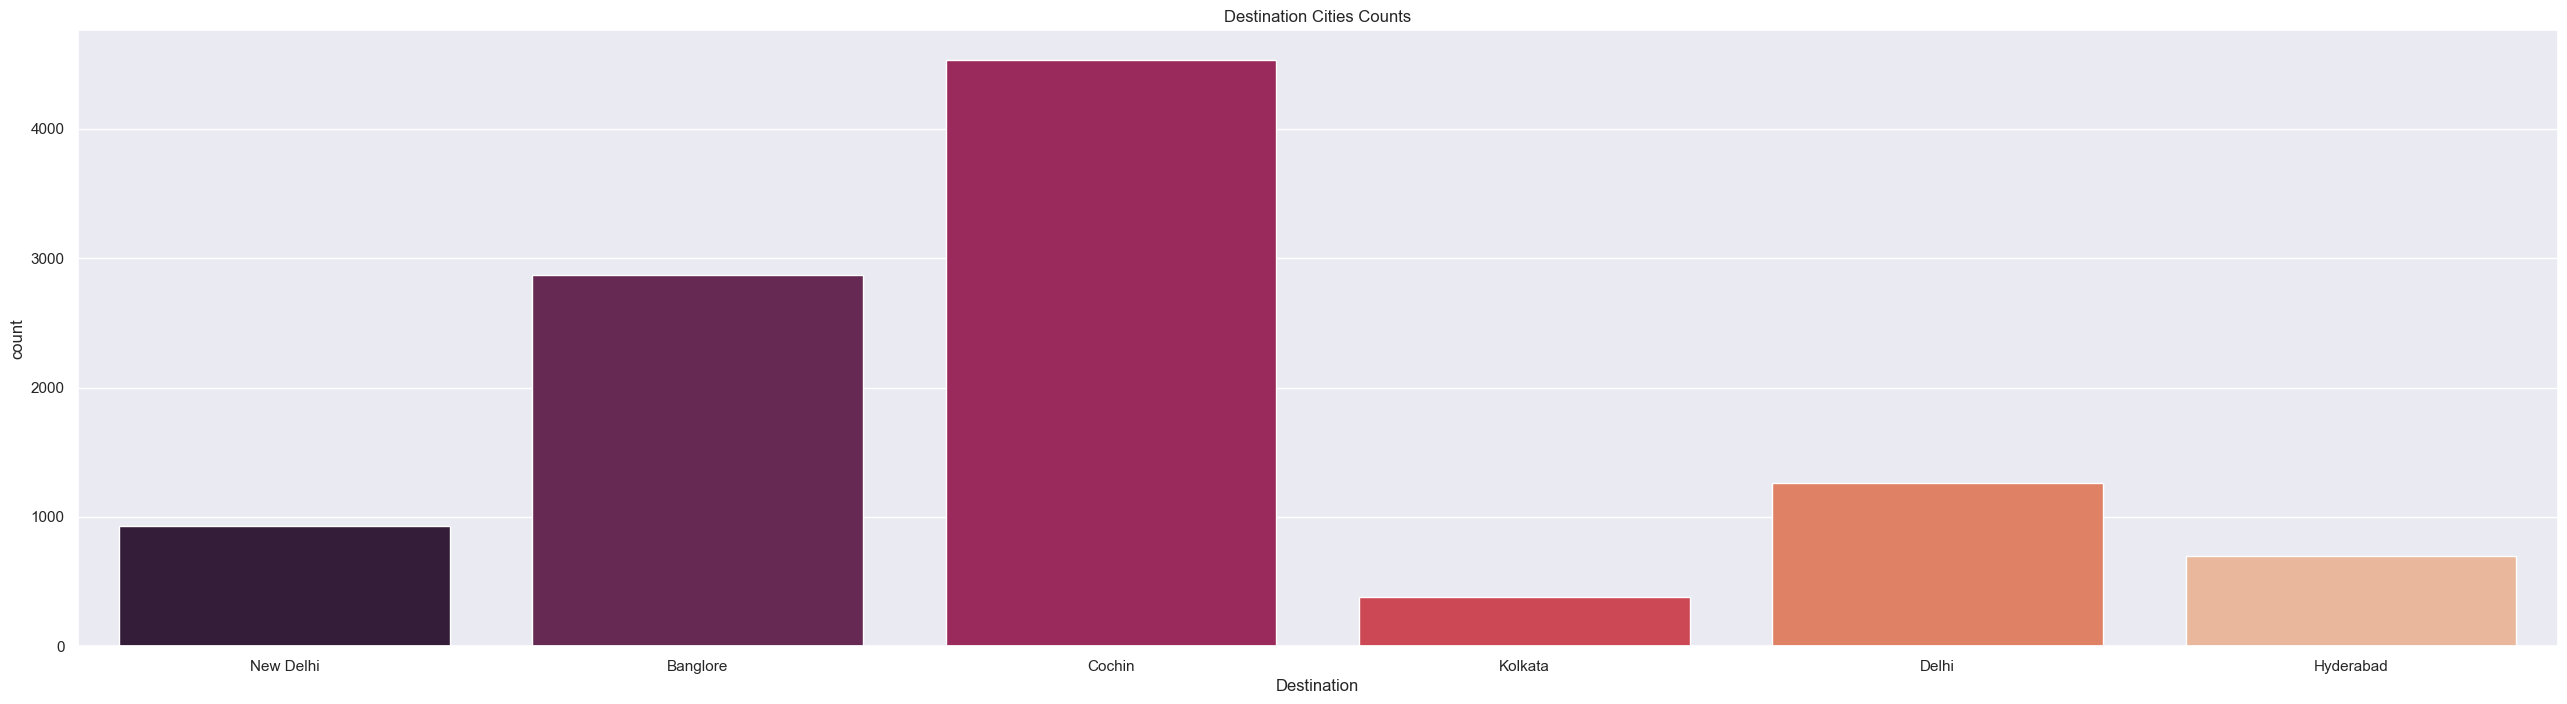

In [154]:
plt.title('Destination Cities Counts')
sns.countplot(x='Destination',data=train_data,palette='rocket')

In [155]:
#In Destination Column the values are categorical
#So we again have to convert these values into the numerical
#So there are six cities only ,so that's why we have to use the OneHotEncoding

# Perform one-hot encoding with get_dummies
#So here the Banglore's city one hot encoding column was deleted
#So in One Hot Encoding table if all the values are 0 ,it means the city is Banglore
Destination = pd.get_dummies(train_data.Destination, drop_first=True, dtype=int)

# Rename the columns
#Destination_OHE_=(Destination_OneHotEncoding_Feature_Name)
Destination.columns = ['Destination_OHE_' + destination for destination  in Destination.columns]

# Display the DataFrame
Destination.head()

,Destination_OHE_Cochin,Destination_OHE_Delhi,Destination_OHE_Hyderabad,Destination_OHE_Kolkata,Destination_OHE_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [156]:
#Route Column
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [157]:
# Count the number of occurrences of each unique value in the 'Route' column of the DataFrame 'train_data
train_data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [158]:
# Count the number of occurrences of each unique value in the 'Total-Stops' column of the DataFrame 'train_data
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64


If we analyze the columns 'Route' and 'Total Stops', we notice that they gives the same information regarding the number of stops a flight makes. 

For example:

In the 'Route' column, a route like "DEL → BOM → COK" suggests that the flight has two stops.

Similarly, in the 'Total Stops' column, the value 2 indicates that the flight has two stops.

Since both columns essentially represent the same information, we can conclude that the 'Route' column is same as 'Total Stops. We have to delete the 'Route' column since the information it provides about the flight's stops is same with the 'Total Stops' column

In [159]:
#Route and Total stops are same so we have to drop the Route column
train_data.drop('Route',axis=1,inplace=True)

In [160]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [161]:
#Now considering the Additional_Info column
train_data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

So from the value counts , total 8344 values having No info. Which cannot gives the accurate result.

Total values in the dataset are 10682.
Out of 10682 ,8344 values having no information.

78% having No Information. So we have to drop the column because through the Additional_Info Column we cannot find the meaningful insights.

So there must be dropping of the Additional_Info Column.


In [162]:
#Dropping of the Additional_Info Column
train_data.drop('Additional_Info',axis=1,inplace=True)

In [163]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


In [164]:
#Now considering the Total_Stops column
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In general, nonstop flights are expected to have higher prices due to the convenience and time-saving factor they offer.

 However, according to the provided dataset:
 Nonstop flights have lower prices on average compared to flights with stops.


In [165]:
# Total_Stops are the ordinal category
# In ordinal category we have to convert the categorical data into numerical data
#So we have to encode the category columns according to the number of stops

train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True) 


In [166]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [167]:
#Combining all the columns by which we have performed One Hot Encoding
final_train_data=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [168]:
#printing the top 5 values from the final data set

final_train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Trujet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy,Source_OHE_Chennai,Source_OHE_Delhi,Source_OHE_Kolkata,Source_OHE_Mumbai,Destination_OHE_Cochin,Destination_OHE_Delhi,Destination_OHE_Hyderabad,Destination_OHE_Kolkata,Destination_OHE_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [169]:
#Now we have to drop the Airline,Source,Destination columns from the final dataset
final_train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)



In [170]:
final_train_data.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Trujet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy,Source_OHE_Chennai,Source_OHE_Delhi,Source_OHE_Kolkata,Source_OHE_Mumbai,Destination_OHE_Cochin,Destination_OHE_Delhi,Destination_OHE_Hyderabad,Destination_OHE_Kolkata,Destination_OHE_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [171]:
final_train_data.shape

(10682, 30)

Based on the value counts, it appears that the dataset only contains data from the year 2019. Consequently, since this column doesn't offer any other year, so it should be dropped from the dataset.

In [172]:
# final_train_data.drop('Year_of_Journey',axis=1,inplace=True)

In [173]:
%%time
final_train_data.head(2)

CPU times: total: 0 ns
Wall time: 0 ns


,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Trujet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy,Source_OHE_Chennai,Source_OHE_Delhi,Source_OHE_Kolkata,Source_OHE_Mumbai,Destination_OHE_Cochin,Destination_OHE_Delhi,Destination_OHE_Hyderabad,Destination_OHE_Kolkata,Destination_OHE_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### TEST DATA

We cannot do the EDA or preprocessing steps together by combining the training data and test data because there may be the chance of Data Leakage.

 Data leakage happens when information from the test set affects the training process, resulting in a model that performs well on test data but poorly on new, unseen data. To avoid this, we must keep the training and test data separate during these steps.

 Due to Data Leakage there may be the chance of the Overfitting.

In [174]:
# Measure the time taken to execute the code block

# Loading the test dataset from an Excel file
test_data=pd.read_excel(r'C:\Users\RITIK CHAUHAN\Desktop\Rishabh\ML Assignment\Data 1\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [175]:
# Set pandas display option to show all columns
pd.set_option('display.max_columns',None)

In [176]:
#printing the top 5 values from the test dataset
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [177]:
#Gives the information of the test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [178]:
#Checking for the missing values from the test dataset
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [179]:
#Gives the unique values count from the Additional Info Column
test_data['Additional_Info'].value_counts()

Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: count, dtype: int64

In [180]:
#There are 80% data contains No Info so we have to drop the column 
#Because through this column we cannot find any meaningful insights
test_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [181]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop


In [182]:
#Extracting the Date and Month from the Date_of_Journey
#Dates are stores in the Day_of_Journey column
#Month are stores in the Month_of_Journey column
test_data['Day_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'],format= "%d/%m/%Y").dt.day
test_data['Month_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'],format= "%d/%m/%Y").dt.month

In [183]:
#Dropping the Date_of_Journey column from the test data
test_data.drop('Date_of_Journey',axis=1,inplace=True)
test_data.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Day_of_Journey,Month_of_Journey
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,6,6


In [184]:
#Extracting the hours and minutes from the Arrival Time column
#Dropping the Arrival Time column from the test dataset
test_data['Arrival_hours']=pd.to_datetime(test_data['Arrival_Time']).dt.hour 
test_data['Arrival_minutes']=pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'],axis=1,inplace=True)


In [185]:
#printing the top 1 value
test_data.head(1)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Arrival_hours,Arrival_minutes
0,Jet Airways,Delhi,Cochin,17:30,10h 55m,1 stop,6,6,4,25


In [186]:
#Extracting the hours and minutes from Dep Time column
test_data['Departure_hours']=pd.to_datetime(test_data['Dep_Time']).dt.hour 
test_data['Departure_minutes']=pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Dep_Time'],axis=1,inplace=True)
test_data.head(1)


,Airline,Source,Destination,Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,4,25,17,30


In [187]:
# Apply the function to the 'Duration' column
test_data['Duration_hours'] = test_data['Duration'].apply(lambda x: splitting_the_hours_and_minutes(x)[0])
test_data['Duration_minutes'] = test_data['Duration'].apply(lambda x: splitting_the_hours_and_minutes(x)[1])

test_data.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,4,25,17,30,10,55


In [188]:
#Dropping the Duration Column from the test data
test_data.drop('Duration',axis=1,inplace=True)

In [189]:
test_data.head(1)

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,6,6,4,25,17,30,10,55


In [190]:
#Counting the unique value counts in the Airline Column
test_data['Airline'].value_counts()

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

In [191]:
#Applying One Hot Encooding to the Airline column
#By dropping the first column after applying the one hot encoding
#One hot encoding is used when we have to convert the categorical values into numerical values
Airline = pd.get_dummies(test_data.Airline, drop_first=True, dtype=int)

# Rename the columns
#Airline_OHE_=(Airline_OneHotEncoding_Feature_Name)
Airline.columns = ['Airline_OHE_' + airline for airline in Airline.columns]

# Display the DataFrame
Airline.head()

,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [192]:
#Counting the unique values from the Source Column
test_data['Source'].value_counts()

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

In [193]:
#Appyling one hot encoding to convert the numerical values 
Source = pd.get_dummies(test_data.Airline, drop_first=True, dtype=int)

# Rename the columns
#Source_OHE_=(Source_OneHotEncoding_Feature_Name)
Source.columns = ['Source_OHE_' + source for source in Source.columns]

# Display the DataFrame
Source.head()

,Source_OHE_Air India,Source_OHE_GoAir,Source_OHE_IndiGo,Source_OHE_Jet Airways,Source_OHE_Jet Airways Business,Source_OHE_Multiple carriers,Source_OHE_Multiple carriers Premium economy,Source_OHE_SpiceJet,Source_OHE_Vistara,Source_OHE_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [194]:
#Counting of unique values from Destination Column
test_data['Destination'].value_counts()

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64

In [195]:
#Applying one hot encoding 
Destination = pd.get_dummies(test_data.Airline, drop_first=True, dtype=int)

# Rename the columns
#Destination_OHE_=(Destination_OneHotEncoding_Feature_Name)
Destination.columns = ['Destination_OHE_' + destination for destination in Destination.columns]

# Display the DataFrame
Destination.head()

,Destination_OHE_Air India,Destination_OHE_GoAir,Destination_OHE_IndiGo,Destination_OHE_Jet Airways,Destination_OHE_Jet Airways Business,Destination_OHE_Multiple carriers,Destination_OHE_Multiple carriers Premium economy,Destination_OHE_SpiceJet,Destination_OHE_Vistara,Destination_OHE_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [196]:
#Conacatenating the column on which we have perfom one hot encoding with test data and stores into the final_test_data
final_test_data=pd.concat([test_data,Airline,Source,Destination],axis=1)

final_test_data.head(1)

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_hours,Duration_minutes,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy,Source_OHE_Air India,Source_OHE_GoAir,Source_OHE_IndiGo,Source_OHE_Jet Airways,Source_OHE_Jet Airways Business,Source_OHE_Multiple carriers,Source_OHE_Multiple carriers Premium economy,Source_OHE_SpiceJet,Source_OHE_Vistara,Source_OHE_Vistara Premium economy,Destination_OHE_Air India,Destination_OHE_GoAir,Destination_OHE_IndiGo,Destination_OHE_Jet Airways,Destination_OHE_Jet Airways Business,Destination_OHE_Multiple carriers,Destination_OHE_Multiple carriers Premium economy,Destination_OHE_SpiceJet,Destination_OHE_Vistara,Destination_OHE_Vistara Premium economy
0,Jet Airways,Delhi,Cochin,1 stop,6,6,4,25,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [197]:
#Dropping of the categorical columns
final_test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [198]:
final_test_data.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_hours,Duration_minutes,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy,Source_OHE_Air India,Source_OHE_GoAir,Source_OHE_IndiGo,Source_OHE_Jet Airways,Source_OHE_Jet Airways Business,Source_OHE_Multiple carriers,Source_OHE_Multiple carriers Premium economy,Source_OHE_SpiceJet,Source_OHE_Vistara,Source_OHE_Vistara Premium economy,Destination_OHE_Air India,Destination_OHE_GoAir,Destination_OHE_IndiGo,Destination_OHE_Jet Airways,Destination_OHE_Jet Airways Business,Destination_OHE_Multiple carriers,Destination_OHE_Multiple carriers Premium economy,Destination_OHE_SpiceJet,Destination_OHE_Vistara,Destination_OHE_Vistara Premium economy
0,1 stop,6,6,4,25,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1 stop,12,5,10,20,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1 stop,21,5,19,0,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1 stop,21,5,21,0,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,non-stop,24,6,2,45,23,55,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [199]:
# Total_Stops are the ordinal category
# In ordinal category we have to convert the categorical data into numerical data
#So we have to encode the category columns according to the number of stops

final_test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True) 

In [200]:
final_test_data.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Arrival_hours,Arrival_minutes,Departure_hours,Departure_minutes,Duration_hours,Duration_minutes,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy,Source_OHE_Air India,Source_OHE_GoAir,Source_OHE_IndiGo,Source_OHE_Jet Airways,Source_OHE_Jet Airways Business,Source_OHE_Multiple carriers,Source_OHE_Multiple carriers Premium economy,Source_OHE_SpiceJet,Source_OHE_Vistara,Source_OHE_Vistara Premium economy,Destination_OHE_Air India,Destination_OHE_GoAir,Destination_OHE_IndiGo,Destination_OHE_Jet Airways,Destination_OHE_Jet Airways Business,Destination_OHE_Multiple carriers,Destination_OHE_Multiple carriers Premium economy,Destination_OHE_SpiceJet,Destination_OHE_Vistara,Destination_OHE_Vistara Premium economy
0,1,6,6,4,25,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### FEATURE SELECTION

So we have to find out the best feature which will contribute and have a good relation with target variable.

Following are some of the feature selection methods:
1. Heatmap
2. Feature Importance

In [201]:
final_train_data.shape

(10682, 30)

In [202]:
#Gives the column names from the final_train_data dataset
final_train_data.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Departure_hours', 'Departure_minutes', 'Arrival_hours',
       'Arrival_minutes', 'Duration_hours', 'Duration_minutes',
       'Airline_OHE_Air India', 'Airline_OHE_GoAir', 'Airline_OHE_IndiGo',
       'Airline_OHE_Jet Airways', 'Airline_OHE_Jet Airways Business',
       'Airline_OHE_Multiple carriers',
       'Airline_OHE_Multiple carriers Premium economy', 'Airline_OHE_SpiceJet',
       'Airline_OHE_Trujet', 'Airline_OHE_Vistara',
       'Airline_OHE_Vistara Premium economy', 'Source_OHE_Chennai',
       'Source_OHE_Delhi', 'Source_OHE_Kolkata', 'Source_OHE_Mumbai',
       'Destination_OHE_Cochin', 'Destination_OHE_Delhi',
       'Destination_OHE_Hyderabad', 'Destination_OHE_Kolkata',
       'Destination_OHE_New Delhi'],
      dtype='object')

In [203]:
#Splitting the independent and dependent feature
#Price is the dependent feature thats why we drop it
X =final_train_data.drop(columns=['Price'])

In [204]:
#printing the top 5 values of the independent features
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes,Airline_OHE_Air India,Airline_OHE_GoAir,Airline_OHE_IndiGo,Airline_OHE_Jet Airways,Airline_OHE_Jet Airways Business,Airline_OHE_Multiple carriers,Airline_OHE_Multiple carriers Premium economy,Airline_OHE_SpiceJet,Airline_OHE_Trujet,Airline_OHE_Vistara,Airline_OHE_Vistara Premium economy,Source_OHE_Chennai,Source_OHE_Delhi,Source_OHE_Kolkata,Source_OHE_Mumbai,Destination_OHE_Cochin,Destination_OHE_Delhi,Destination_OHE_Hyderabad,Destination_OHE_Kolkata,Destination_OHE_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [205]:
#Dependent feature
y=final_train_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<Axes: >

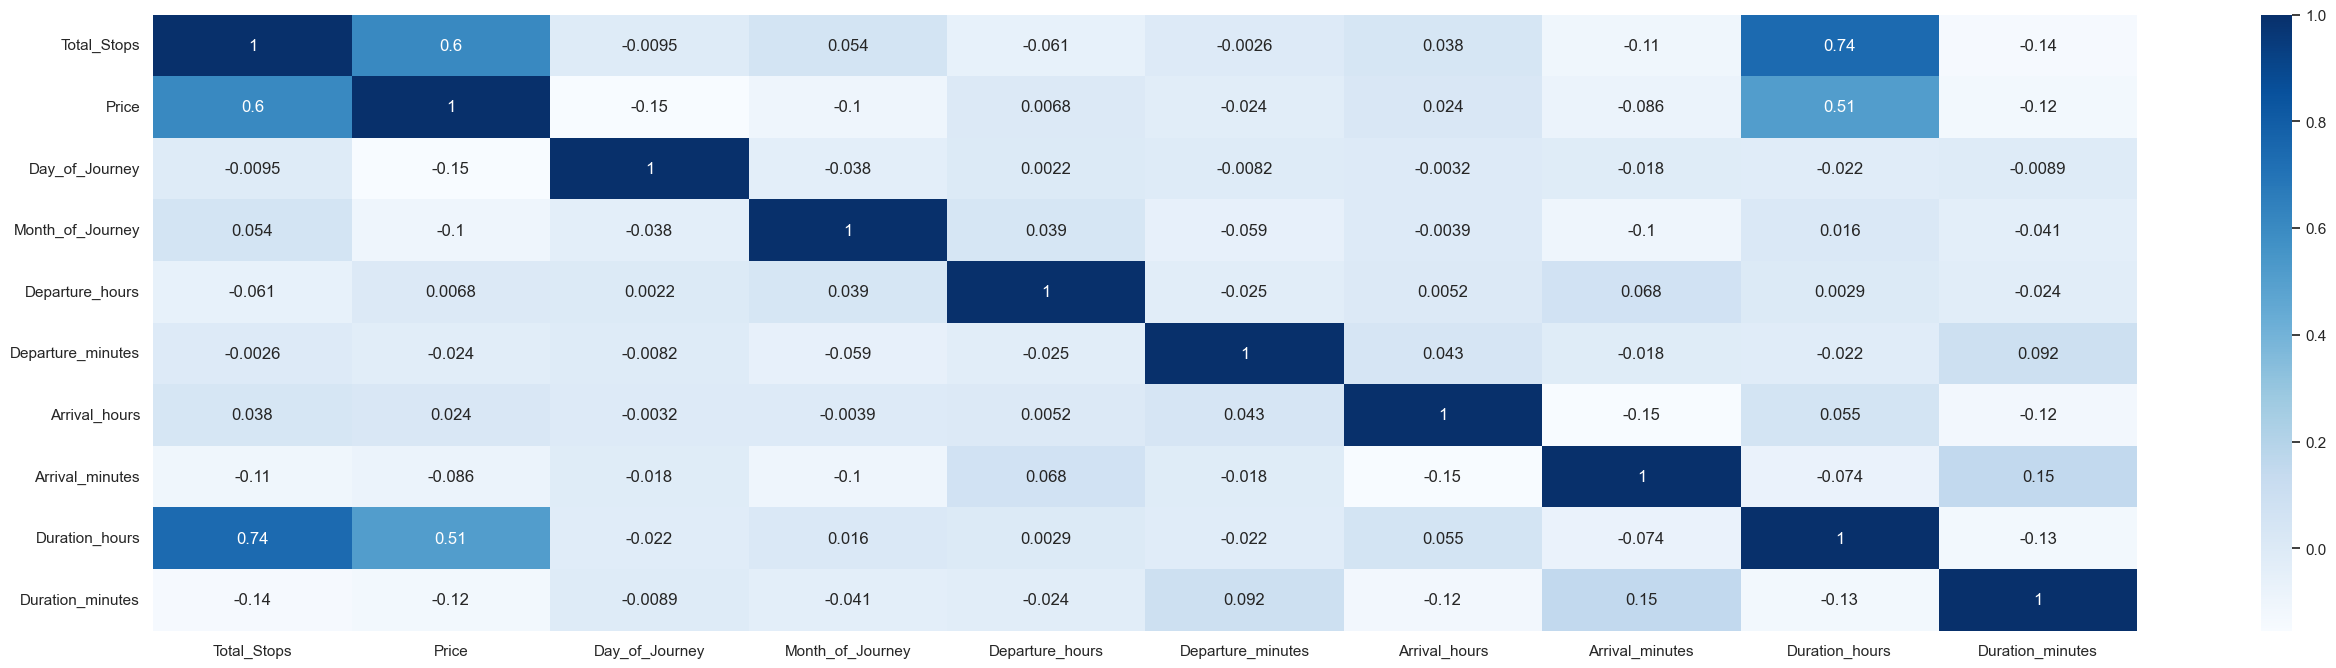

In [208]:
#Correlation between Independent and dependent features

# Select only the numeric columns
numeric_cols = train_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

Observation:
- Duration_hours have the highest correlation.
- Then price feature have the highest correlation.


### ExtraTreesRegressor

ExtraTreesRegressor is used to select the important features.

In [209]:
#ExtraTreesRegressor is used to give the important features for training the model

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

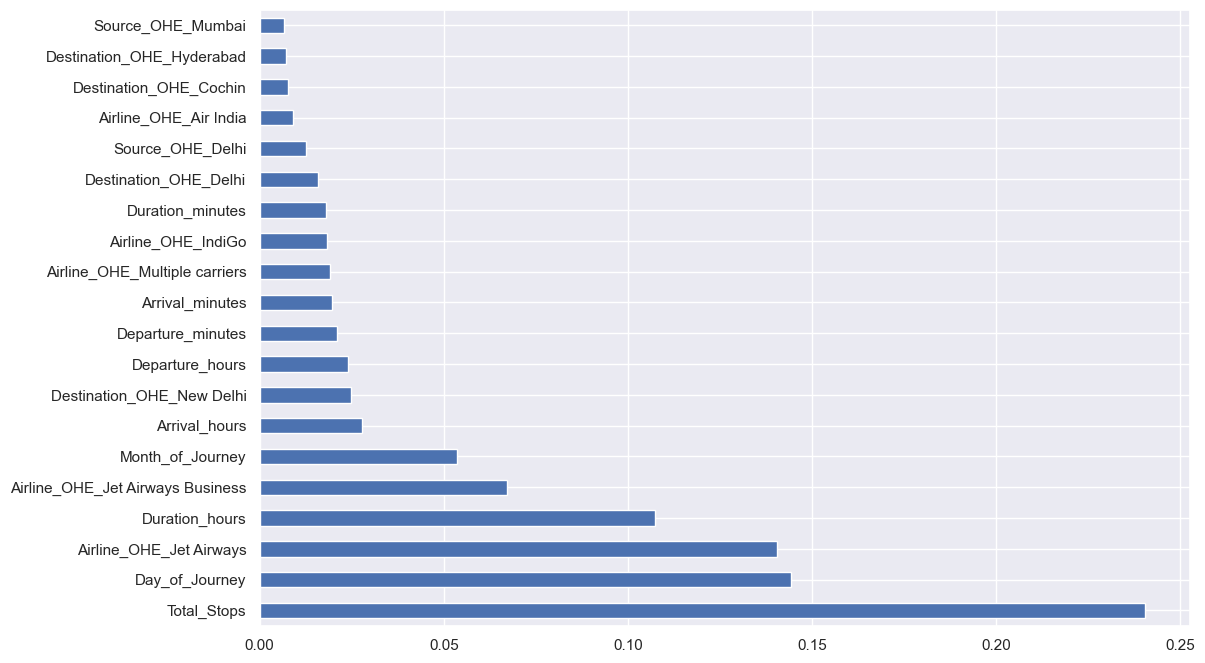

In [210]:

#Important Feature
plt.figure(figsize=(12,8))
important_features=pd.Series(selection.feature_importances_,index=X.columns)
important_features.nlargest(20).plot(kind='barh')
plt.show()

From above the diagram:

- Total_stops is very important feature.
- Then Day of Journey and Jet Airways features are important.
- Then Jet Airways Business and month.

### Model fitting using Random Forest

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [212]:

#Importing the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [213]:
%%time
# Using the trained Random Forest Regressor model (rfr) to predict values for the test data (X_test)
y_prediction=rfr.predict(X_test)


CPU times: total: 31.2 ms
Wall time: 75.4 ms


In [214]:
y_prediction

array([16932.82      ,  5458.37      ,  8914.44      , ...,
        6599.31      , 13076.49333333, 13284.25661905])

In [215]:
#Training Data Score
rfr.score(X_train,y_train)

0.9529462718843642

In [216]:
#Testing Data Score
rfr.score(X_test,y_test)

0.796877817380788

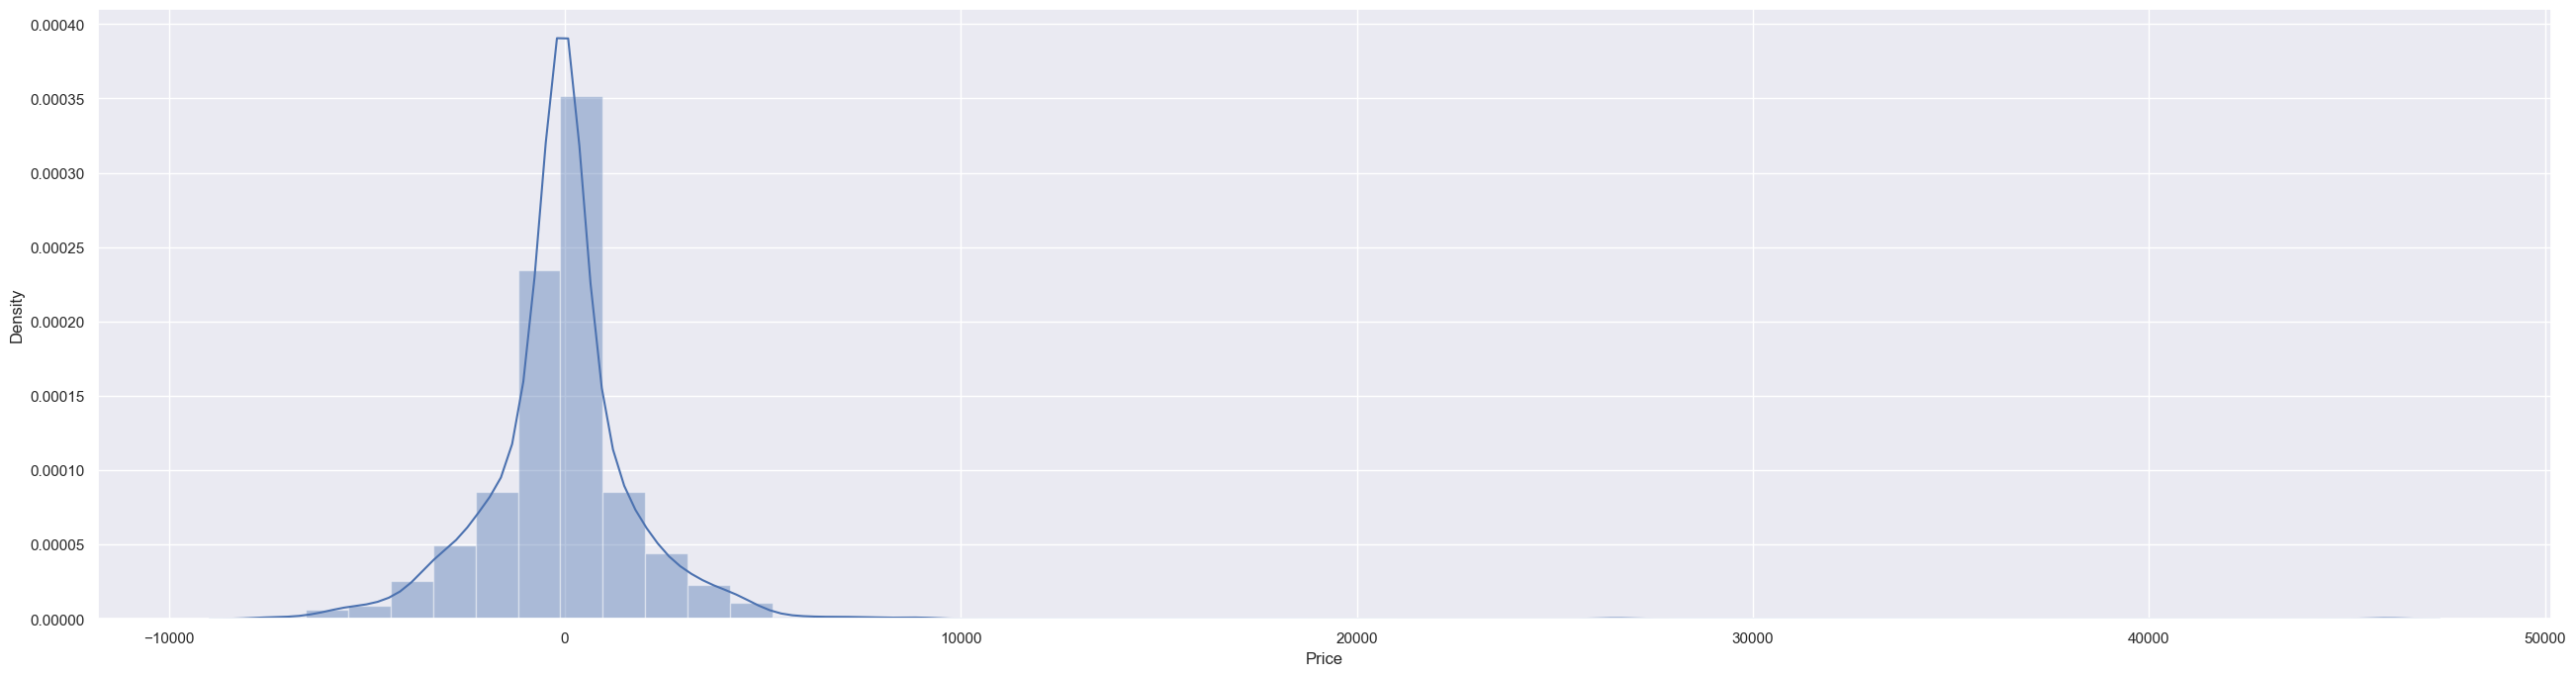

In [217]:
# Calculate the differences between actual and predicted values
# Plotting the distribution of differences using Seaborn's distplot
sns.distplot(y_test - y_prediction)
plt.show()

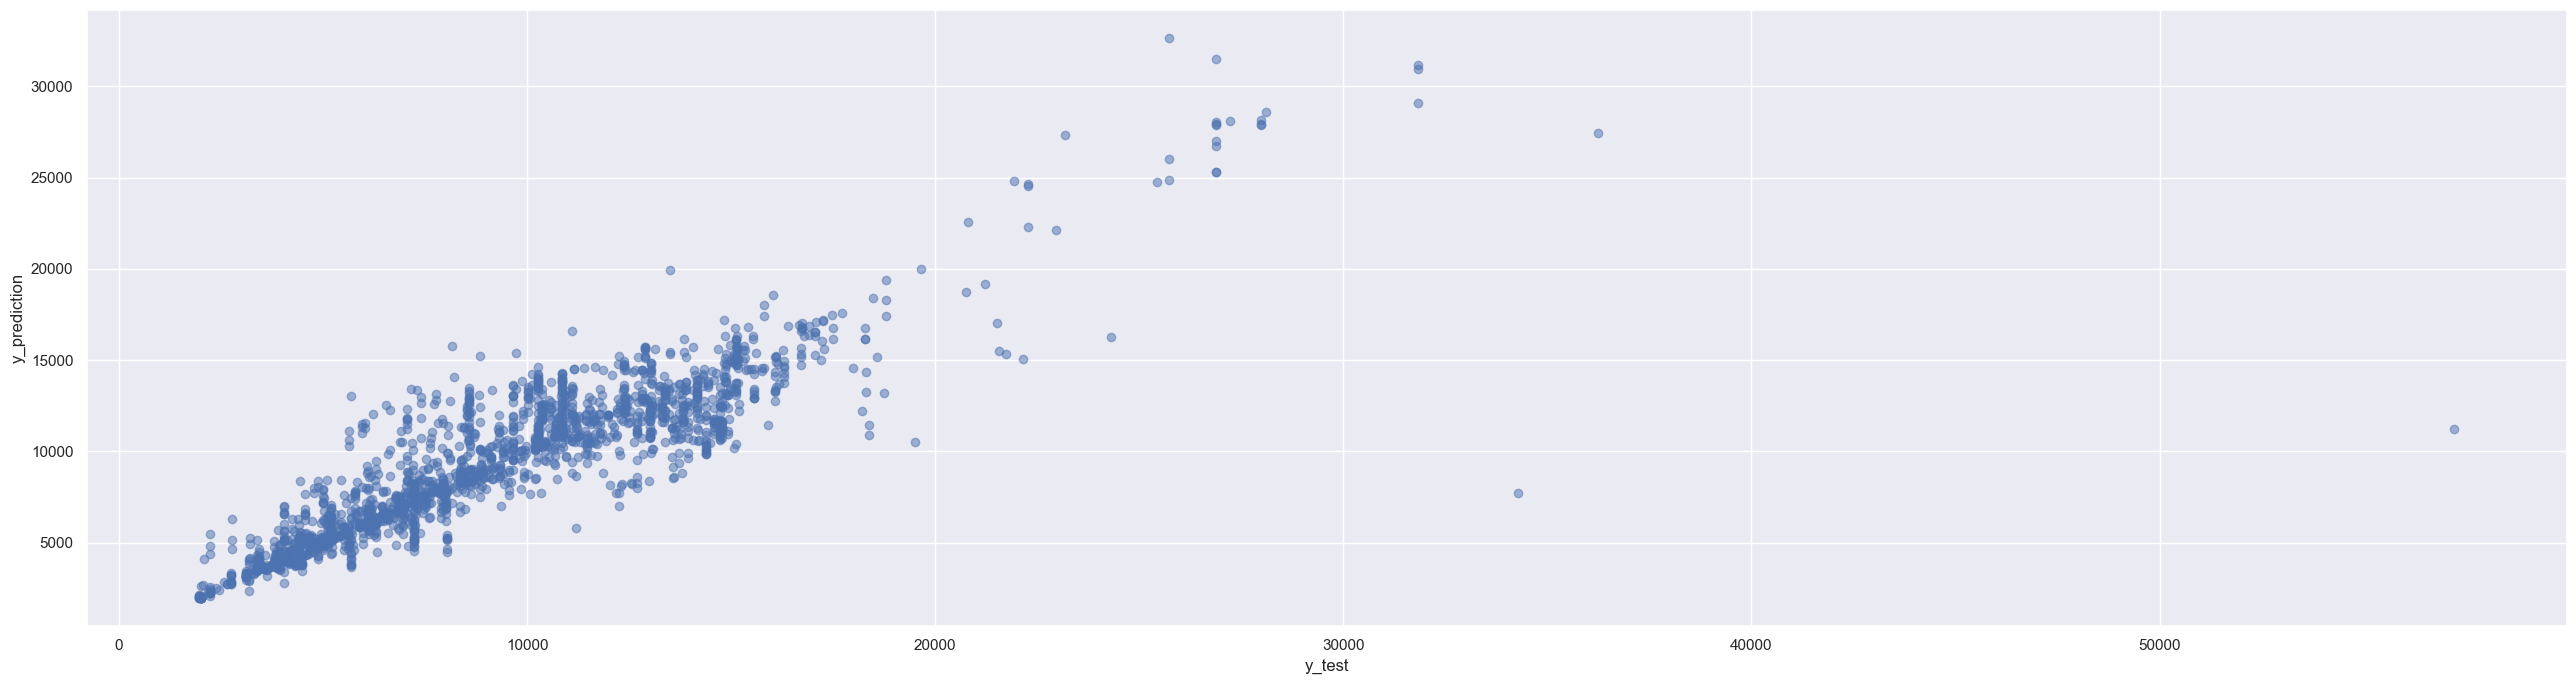

In [218]:
#Scatter Plot
plt.scatter(y_test,y_prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()

In [219]:
from sklearn import metrics


In [220]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

Mean Absolute Error: 1177.2544704351828
Mean Squared Error: 4379731.942322126
Root Mean Squared Error: 2092.780911209323


In [221]:
# R2 Score
metrics.r2_score(y_test,y_prediction)

0.796877817380788

In [222]:

# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
dtr = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
dtr.fit(X, y) 

DecisionTreeRegressor(random_state=0)

In [223]:

y_pred=dtr.predict(X_test)


In [224]:
#Training Data Score
dtr.score(X_train,y_train)

0.9626712114059347

In [225]:
#Testing Data Score
dtr.score(X_test,y_test)

0.9658262236657966

In [226]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 380.2993827573144
Mean Squared Error: 736856.8901274011
Root Mean Squared Error: 858.4036871585542


In [227]:
# R2 Score
metrics.r2_score(y_test,y_pred)

0.9658262236657966

### HYPER PARAMETER TUNING

Hyperparameter tuning is the process of finding the best settings for a machine learning model to improve its performance.

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance.

Proper tuning of these parameters is crucial for optimizing model performance, preventing overfitting or underfitting, and improving training efficiency.

In [228]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
#Randomized Search CV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of features to consider at every split
max_features=['auto','sqrt']

#Maximum number of levels in trees
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [230]:
#Creating a Random Grid

grid={'n_estimators':n_estimators,
      'max_features':max_features,
      'max_depth':max_depth,
      'min_samples_split':min_samples_split,
      'min_samples_leaf':min_samples_leaf}

In [231]:
# Metric used to evaluate the model (negative mean squared error in this case)
# Cross-validation strategy (5-fold cross-validation in this case)
# Controls the verbosity: the higher, the more messages
#n_jobs: Specifies the number of parallel jobs to run.
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [232]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [233]:
# Accessing the best hyperparameter values found by RandomizedSearchCV
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [234]:

prediction=rf_random.predict(X_test)

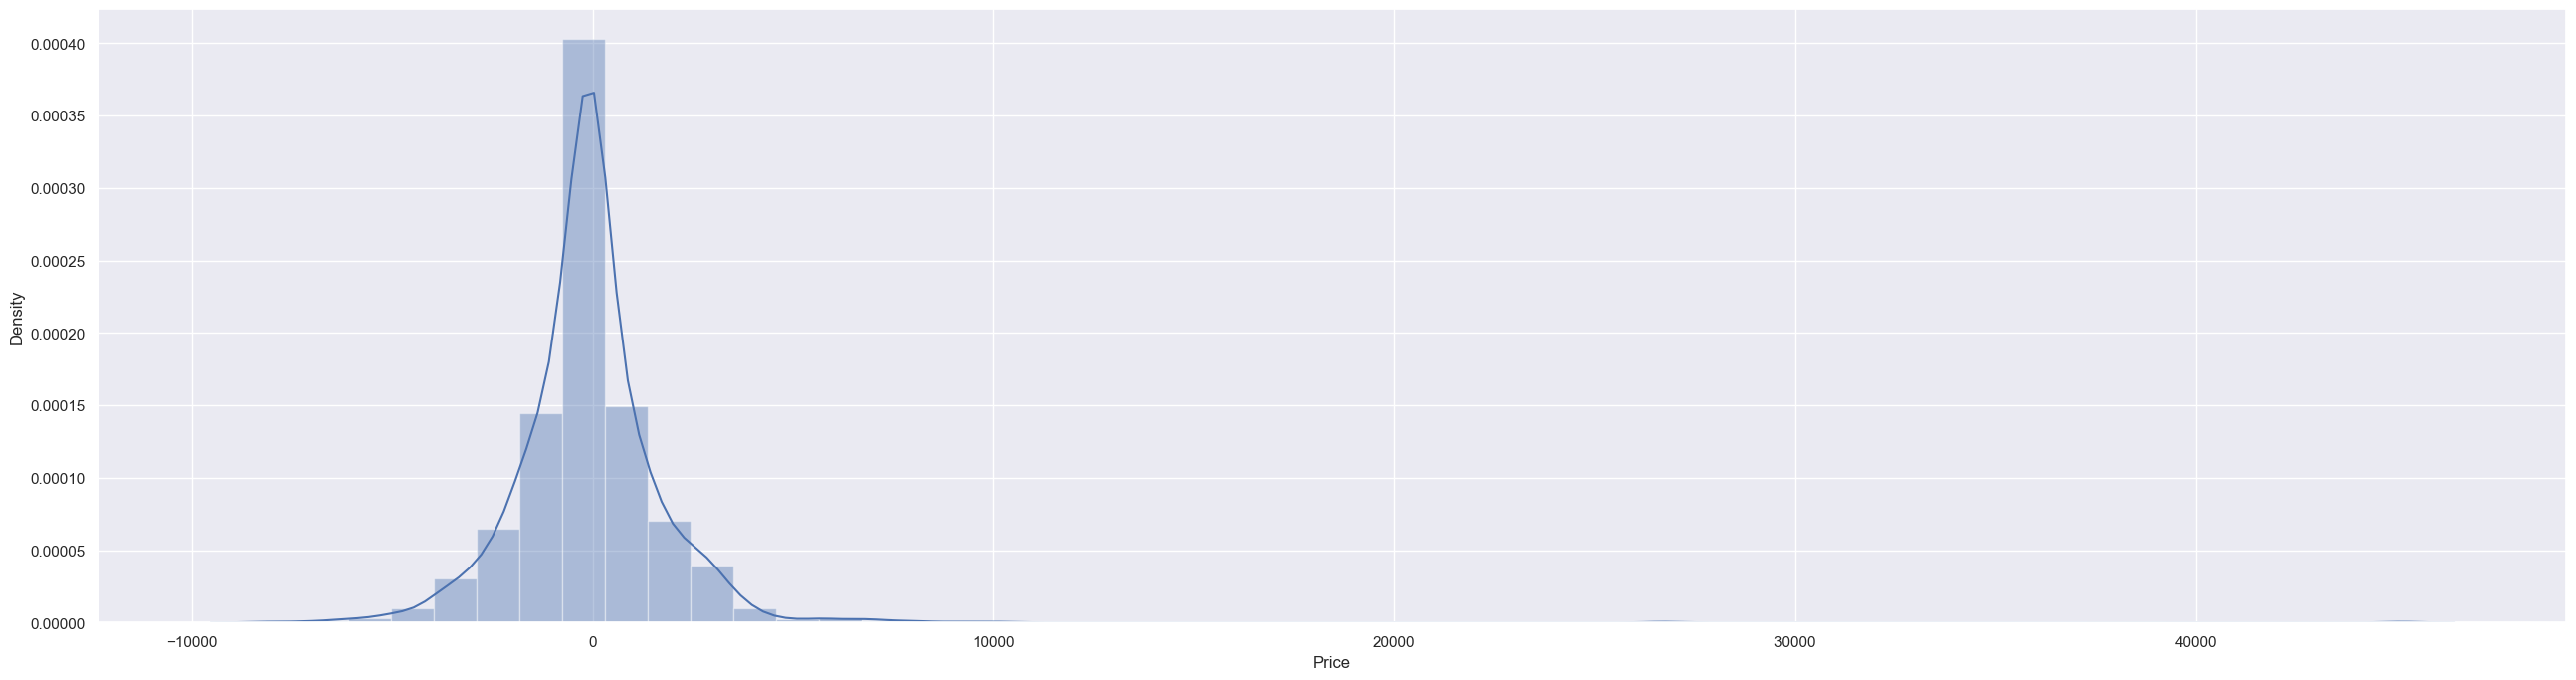

In [235]:
sns.distplot(y_test - prediction)
plt.show()

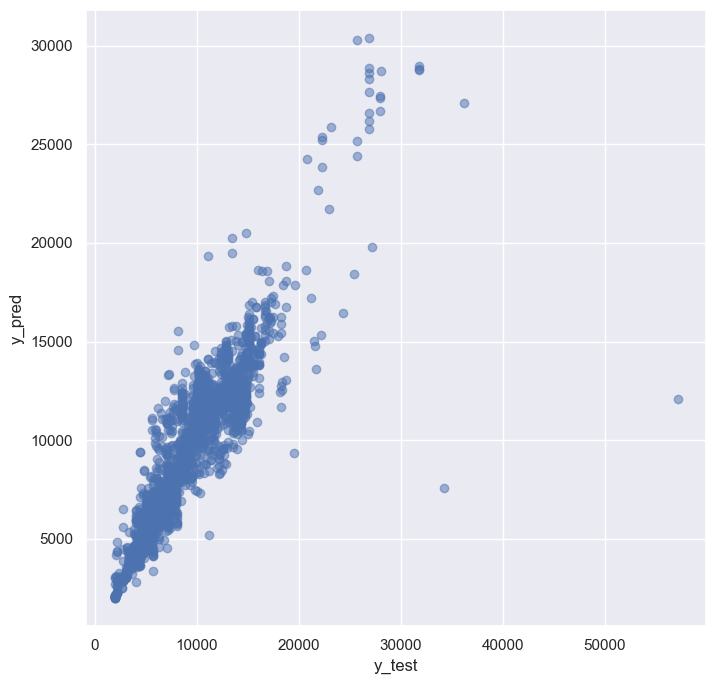

In [236]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [237]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
print('Root Mean Squared Error:',np.mean(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error: 1165.549392184172
Mean Squared Error: 4048679.525794119
Root Mean Squared Error: 4048679.525794119


In [238]:
from prettytable import PrettyTable

# Create a PrettyTable instance
x = PrettyTable()

# Define the column names (field names)
x.field_names = ["Model Name", " RMSE", " MAE","MSE","R2 Score"]

# Add rows of data for each model
x.add_row(['Random Forest','2090.865','1181.12','4371719.39','0.797'])
x.add_row(['Decision Tree','858.403','380.299','736856.89','0.965'])

print(x)

+---------------+----------+---------+------------+----------+
|   Model Name  |   RMSE   |    MAE  |    MSE     | R2 Score |
+---------------+----------+---------+------------+----------+
| Random Forest | 2090.865 | 1181.12 | 4371719.39 |  0.797   |
| Decision Tree | 858.403  | 380.299 | 736856.89  |  0.965   |
+---------------+----------+---------+------------+----------+


### CONCLUSION

In conclusion, the Flight Price Prediction project involved extensive data preprocessing, exploratory data analysis (EDA), feature engineering, and model building using machine learning techniques. 

Here's a summary of the key steps and findings:

Data Preprocessing:

- Loaded the dataset from Excel files, handled missing values, and converted date and time features into appropriate formats.

- Performed EDA to understand the distribution and relationships of features, identifying outliers and categorical variables that required encoding.

Feature Engineering:

- Extracted meaningful features from date and time columns (day, month, hour, minute).


- Performed one-hot encoding for categorical features like 'Airline', 'Source', and 'Destination'.

EDA Insights:

- Visualized the distribution of flight prices across different airlines, sources, and destinations.

Model Building:

Used Random Forest Regressor and Decision Tree Regressor models for predicting flight prices.
Evaluated model performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared score.


